## What is a time series problem
In the field for machine learning and data science, most of the real-life problems are based upon the prediction of future which is totally oblivious to us such as stock market prediction, future sales prediction and so on.Time series problem is basically the prediction of such problems using various machine learning tools.Time series problem is tackled efficiently when first it is analyzed properly (Time Series Analysis) and according to that observation suitable algorithm is used (Time Series Forecasting).

# Librarys
Importing Librarys

In [1]:

# Load required Libraries 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #to plot some parameters in seaborn
from sklearn.linear_model import LinearRegression # To work on Linear Regression
from sklearn.metrics import r2_score # To Calculate Performance matrix
import statsmodels.api as sm # To calculatestats modle
import seaborn as sns




# Importing Dataset

In [82]:
# Reading the data
df = pd.read_csv('DataFrames/Electric_Production.csv')

In [7]:
# A glance on the data 
df.head()

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


In [8]:
# getting some information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    397 non-null    object 
 1   Value   397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


From this you can infer two necessary things:
1. You really need to change change columns name
2. Both the columns have object datatype

In [9]:
# further Analysis 
df.describe()

,Value
count,397.000000
mean,88.847218
std,15.387834
min,55.315100
25%,77.105200
50%,89.779500
75%,100.524400
max,129.404800


In [10]:
df.columns = ["DATE", "value"]
df.head()

,DATE,value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


In [11]:
df.dtypes

DATE      object
value    float64
dtype: object

In [15]:
df['value'].unique()

array([ 72.5052,  70.672 ,  62.4502,  57.4714,  55.3151,  58.0904,
        62.6202,  63.2485,  60.5846,  56.3154,  58.0005,  68.7145,
        73.3057,  67.9869,  62.2221,  57.0329,  55.8137,  59.9005,
        65.7655,  64.4816,  61.0005,  57.5322,  59.3417,  68.1354,
        73.8152,  70.062 ,  65.61  ,  60.1586,  58.8734,  63.8918,
        68.8694,  70.0669,  64.1151,  60.3789,  62.4643,  70.5777,
        79.8703,  76.1622,  70.2928,  63.2384,  61.4065,  67.1097,
        72.9816,  75.7655,  67.5152,  63.2832,  65.1078,  73.8631,
        77.9188,  76.6822,  73.3523,  65.1081,  63.6892,  68.4722,
        74.0301,  75.0448,  69.3053,  65.8735,  69.0706,  84.1949,
        84.3598,  77.1726,  73.1964,  67.2781,  65.8218,  71.4654,
        76.614 ,  77.1052,  73.061 ,  67.4365,  68.5665,  77.6839,
        86.0214,  77.5573,  73.365 ,  67.15  ,  68.8162,  74.8448,
        80.0928,  79.1606,  73.5743,  68.7538,  72.5166,  79.4894,
        85.2855,  80.1643,  74.5275,  69.6441,  67.1784,  71.2

We can see here that this series consist an anamolous data which is the last one.

In [ ]:
df = df.drop(df.index[df['average_monthly_ridership'] == ' n=114'])

In [ ]:
df['average_monthly_ridership'].unique()

array(['648', '646', '639', '654', '630', '622', '617', '613', '661',
       '695', '690', '707', '817', '839', '810', '789', '760', '724',
       '704', '691', '745', '803', '780', '761', '857', '907', '873',
       '910', '900', '880', '867', '854', '928', '1064', '1103', '1026',
       '1102', '1080', '1034', '1083', '1078', '1020', '984', '952',
       '1033', '1114', '1160', '1058', '1209', '1200', '1130', '1182',
       '1152', '1116', '1098', '1044', '1142', '1222', '1234', '1155',
       '1286', '1281', '1224', '1280', '1228', '1181', '1156', '1124',
       '1205', '1260', '1188', '1212', '1269', '1246', '1299', '1284',
       '1345', '1341', '1308', '1448', '1454', '1467', '1431', '1510',
       '1558', '1536', '1523', '1492', '1437', '1365', '1310', '1441',
       '1450', '1424', '1360', '1429', '1440', '1414', '1408', '1337',
       '1258', '1214', '1326', '1417', '1329', '1461', '1425', '1419',
       '1432', '1394', '1327'], dtype=object)

Now our data is clean !!!

Changing data type of both the column
* Assign int to `monthly_ridership_data` column
* Assign datetime to `month` column

In [16]:
df['value'] = df['value'].astype(np.int32)

In [19]:
df['DATE'] = pd.to_datetime(df['DATE'],)

In [22]:
df.dtypes

DATE     datetime64[ns]
value             int32
dtype: object

# Time Series Analysis

**Horizental Pattern** :- Horizontal pattern exists when data values fluctuate around a constant mean. This is the simplest pattern and the easiest to predict. An example is sales of a product that do not increase or decrease over time. This type of pattern is common for products in the mature stage of their life cycle, in which demand is steady and predictable.

**Trend Pattern**:- As the name suggests trend depicts the variation in the output as time increases.It is often non-linear. Sometimes we will refer to trend as “changing direction” when it might go from an increasing trend to a decreasing trend.

**Seasonal Pattern**:- As its name depicts it shows the repeated pattern over time. In layman terms, it shows the seasonal variation of data over time.

**Moving Average**:-As the name suggests moving average is a technique to get an overall idea of the trends in a data set; it is an average of any subset of numbers. The moving average is extremely useful for forecasting long-term trends

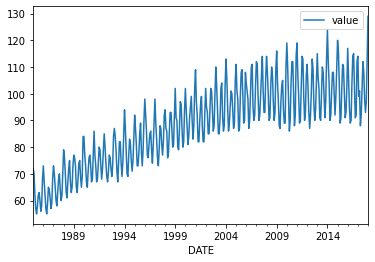

In [23]:
# Normal line plot so that we can see data variation
# We can observe that average number of riders is increasing most of the time
# We'll later see decomposed analysis of that curve
df.plot.line(x = 'DATE', y = 'value')
plt.show()

## Ploting monthly variation of dataset
It gives us idea about seasonal variation of our data set

In [24]:
to_plot_monthly_variation = df

In [25]:
# only storing month for each index 
mon = df['DATE']

In [26]:
# decompose yyyy-mm data-type 
temp= pd.DatetimeIndex(mon)

In [27]:
# assign month part of that data to ```month``` variable
month = pd.Series(temp.month)

In [28]:
# dropping month from to_plot_monthly_variation
to_plot_monthly_variation = to_plot_monthly_variation.drop(['DATE'], axis = 1)

In [29]:
# join months so we can get month to average monthly rider mapping
to_plot_monthly_variation = to_plot_monthly_variation.join(month)

In [30]:
# A quick glance
to_plot_monthly_variation.head()

,value,DATE
0,72,1
1,70,2
2,62,3
3,57,4
4,55,5


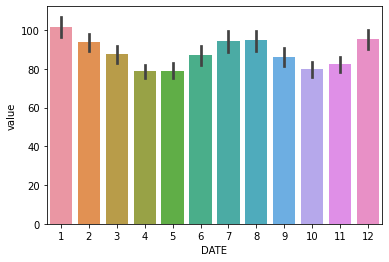

In [33]:
# Plotting bar plot for each month
sns.barplot(x = 'DATE', y = 'value', data = to_plot_monthly_variation)
plt.show()

Well this looks tough to decode. Not a typical box plot. One can infer that data is too sparse for this graph to represent any pattern. Hence it  cannot represents monthly variation effectively.In such a scenerio we can use our traditional scatter plot to understand pattern in dataset

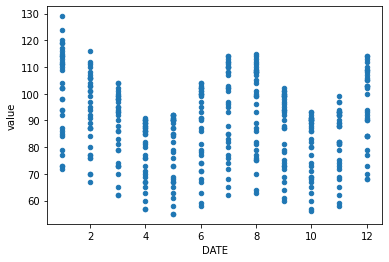

In [34]:
to_plot_monthly_variation.plot.scatter(x = 'DATE', y = 'value')
plt.show()

We can see here the yearly variation of data in this plot. To understand this curve more effectively first look at the every row from bottom to top and see each year's variation.To understand yearly variation take a look at each column representing a  month.

Another tool to visualize the data is the seasonal_decompose function in statsmodel. With this, the trend and seasonality become even more obvious.

In [35]:
value = df[['value']]

## Trend Analysis

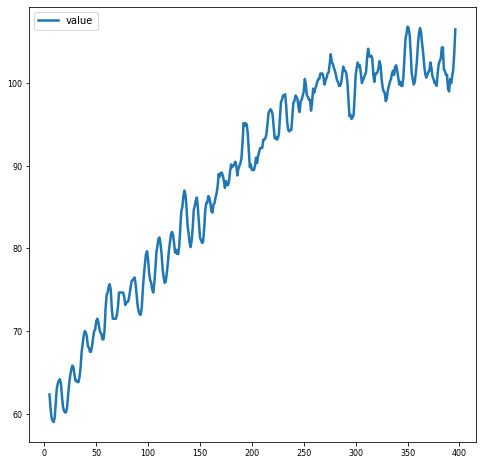

In [39]:
value.rolling(6).mean().plot(figsize=(8,8), linewidth=2.5, fontsize=8)
plt.show()

For trend analysis, we use smoothing techniques. In statistics smoothing a data set means to create an approximating function that attempts to capture important patterns in the data, while leaving out noise or other fine-scale structures/rapid phenomena. In smoothing, the data points of a signal are modified so individual points (presumably because of noise) are reduced, and points that are lower than the adjacent points are increased leading to a smoother signal.We implement smoothing by taking moving averages. [Exponential moving average] is frequently used to compute smoothed function.Here we used the rolling method which is inbuilt in pandas and frequently used for smoothing.

## Seasonability Analysis


Two most famous seasonability analysis algorithms are:-
## [Using 1st discrete difference of object](https://machinelearningmastery.com/difference-time-series-dataset-python/)

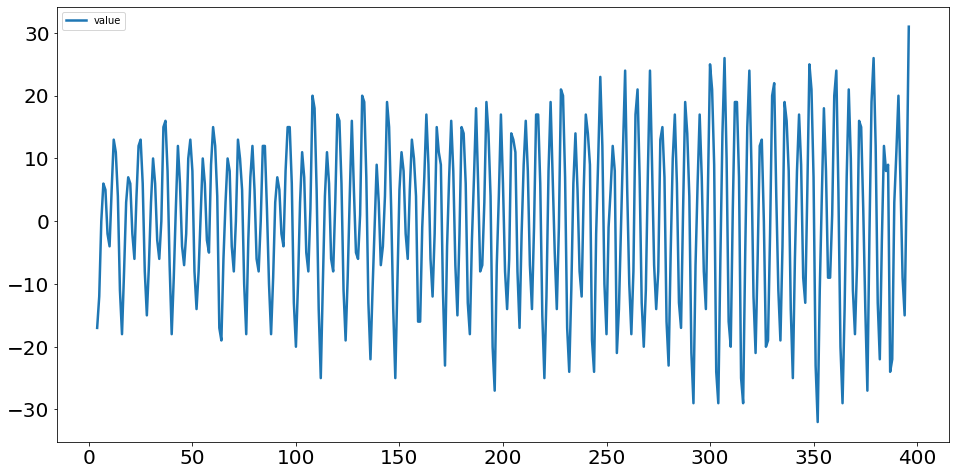

In [43]:
value.diff(periods=4).plot(figsize=(16,8), linewidth=2.5, fontsize=20)
plt.show()

The above figure represents difference between average rider of a month and 4 months before that month i.e

> $d[month] = a[month] - a[month - periods]$.

This gives us idea about variation of data for a period of time.

In [44]:
df = df.set_index('DATE')

In [45]:
# Applying Seasonal ARIMA model to forcast the data 
mod = sm.tsa.SARIMAX(df['value'], trend='n', order=(0,1,0), seasonal_order=(1,1,1,12))
results = mod.fit()
print(results.summary())

/home/venom/.local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/venom/.local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.36974D+00    |proj g|=  5.30490D-02

At iterate    5    f=  2.35525D+00    |proj g|=  1.31187D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7      9      1     0     0   3.672D-06   2.355D+00
  F =   2.3552511416959585     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                                      SARIMAX Results                                       
Dep. Variable:                         

## Prediction

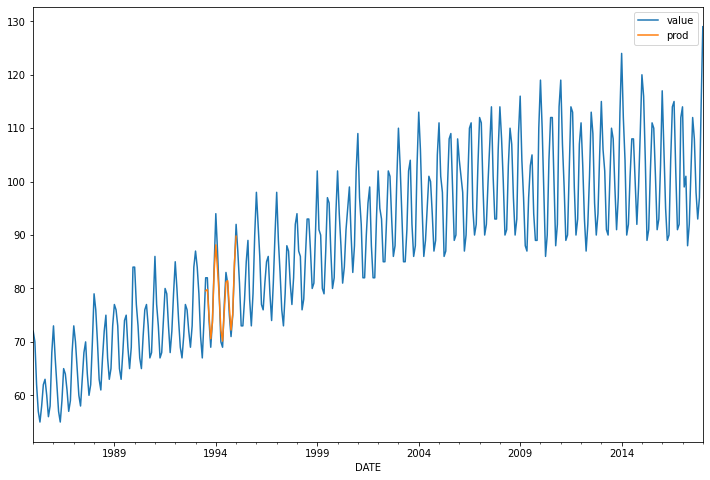

In [46]:
df['prod'] = results.predict(start = 102, end= 120, dynamic= True)  
df[['value', 'prod']].plot(figsize=(12, 8))
plt.show()

## Accuracy

In [52]:
expected=df['value'].tail(12)
predictions=df['prod'].tail(12)

In [67]:
len(expected)

12

In [75]:
predictions=predictions.fillna(0)

In [79]:
predictions.astype('int32')

DATE
2017-02-01    0
2017-03-01    0
2017-04-01    0
2017-05-01    0
2017-06-01    0
2017-07-01    0
2017-08-01    0
2017-09-01    0
2017-10-01    0
2017-11-01    0
2017-12-01    0
2018-01-01    0
Name: prod, dtype: int32

In [81]:
expected

DATE
2017-02-01     99
2017-03-01    101
2017-04-01     88
2017-05-01     92
2017-06-01    102
2017-07-01    112
2017-08-01    108
2017-09-01     98
2017-10-01     93
2017-11-01     97
2017-12-01    114
2018-01-01    129
Name: value, dtype: int32

In [80]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(expected, predictions)
rmse = sqrt(mse)
print('Root MeanSquared Error: %f' % rmse)

Root MeanSquared Error: 103.328360


The RMSE error values are in the same units as the predictions. As with the mean squared error, an RMSE of zero indicates no error